In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

x = np.linspace(-5.0, 5.0, 100)
y = np.sqrt(10**2 - x**2)
y = np.hstack([y, -y])
x = np.hstack([x, x])

In [2]:
x1 = np.linspace(-5.0, 5.0, 100)
y1 = np.sqrt(5**2 - x1**2)
y1 = np.hstack([y1, -y1])
x1 = np.hstack([x1, -x1])

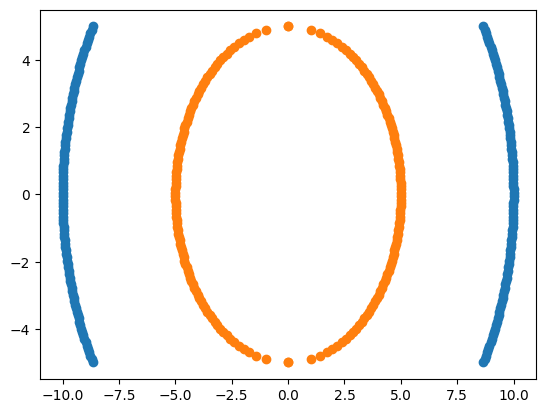

In [3]:
plt.scatter(y,x)
plt.scatter(y1,x1)

In [4]:
df1 = pd.DataFrame(np.vstack([y,x]).T, columns=['X1','X2'])
df1['Y'] = 0
df2 = pd.DataFrame(np.vstack([y1,x1]).T, columns=['X1','X2'])
df2['Y'] = 1
df = pd.concat([df1, df2])
df.head()

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [5]:
X = df.iloc[:, :2]
y = df.Y

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
df['X1_square'] = df['X1']**2
df['X2_square'] = df['X2']**2
df['X1*X2'] = df['X1']*df['X2']
df.head()

,X1,X2,Y,X1_square,X2_square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [8]:
X = df[['X1', 'X2', 'X1_square', 'X2_square', 'X1*X2']]
y = df['Y']

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:

import plotly.express as px
fig = px.scatter_3d(df, x='X1', y='X2', z='X1*X2', color='Y')
fig.show()

In [13]:
fig = px.scatter_3d(df, x='X1_square', y='X2_square', z='X1*X2', color='Y')
fig.show()

In [14]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)



In [16]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
print(accuracy_score(y_test, y_pred))

[[44  0]
 [ 0 36]]
1.0


In [21]:
import numpy as np

import plotly.graph_objects as go

# Extract the data
X1_square = df['X1_square']
X2_square = df['X2_square']
X1_X2 = df['X1*X2']

# Fit a plane to the data
A = np.c_[X1_square, X2_square, np.ones(X1_square.shape[0])]
C, _, _, _ = np.linalg.lstsq(A, X1_X2, rcond=None)

# Create a grid to plot the plane
x_range = np.linspace(X1_square.min(), X1_square.max(), 10)
y_range = np.linspace(X2_square.min(), X2_square.max(), 10)
xx, yy = np.meshgrid(x_range, y_range)
zz = C[0] * xx + C[1] * yy + C[2]

# Create the 3D scatter plot
fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=X1_square, y=X2_square, z=X1_X2,
    mode='markers',
    marker=dict(size=5, color=df['Y'], colorscale='Viridis', opacity=0.8)
))

# Add the best fit plane
fig.add_trace(go.Surface(
    x=xx, y=yy, z=zz,
    colorscale='Viridis',
    opacity=0.5
))

# Update layout
fig.update_layout(
    scene=dict(
        xaxis_title='X1_square',
        yaxis_title='X2_square',
        zaxis_title='X1*X2'
    ),
    title='3D Scatter Plot with Best Fit Plane'
)

fig.show()